<a href="https://colab.research.google.com/github/ELMohamedAyoub/DataMining_Project/blob/main/Projet_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing cause_of_deaths in Many Regions

---

### Objectives
- Clean and organize the dataset to ensure accuracy and consistency for further analysis.
- Use Python for in-depth analysis to identify top causes of death globally and regionally.
- Evaluate trends over time, highlighting increases or decreases in specific causes of death.
- Create informative and aesthetically appealing graphs using Matplotlib and Seaborn to visualize the data clearly.
- Going beyond the standard charts by incorporating innovative visual techniques (e.g., animation, heatmaps, etc.).
- Use Python to develop a simple model predicting future trends based on historical data.

### Importing Required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the dataset

In [11]:
# read data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cause_of_deaths.csv')

### Display initial information

In [13]:
df.head(10)

Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   
5       Afghanistan  AFG  1995        3102   
6       Afghanistan  AFG  1996        3193   
7       Afghanistan  AFG  1997        3304   
8       Afghanistan  AFG  1998        3281   
9       Afghanistan  AFG  1999        3200   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   
5                                     1225                  394   
6                                     1239                  398   
7                                     1253                  402   
8                                     1267                  405   
9                                     1281                  409   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3                      2837      108      1687                    2589  ...   
4                      3081      211      1809                    2849  ...   
5                      3131      175      1881                    2969  ...   
6                      3175      175      1969                    3331  ...   
7                      3250      240      2078                    3028  ...   
8                      3193      563      2098                    3098  ...   
9                      3115      468      2084                    2917  ...   

   Diabetes Mellitus  Chronic Kidney Disease  Poisonings  \
0               2108                    3709         338   
1               2120                    3724         351   
2               2153                    3776         386   
3               2195                    3862         425   
4               2231                    3932         451   
5               2248                    3974         467   
6               2298                    4041         485   
7               2347                    4094         504   
8               2388                    4120         505   
9               2437                    4150         502   

   Protein-Energy Malnutrition  Road Injuries  Chronic Respiratory Diseases  \
0                         2054           4154                          5945   
1                         2119           4472                          6050   
2                         2404           5106                          6223   
3                         2797           5681                          6445   
4                         3038           6001                          6664   
5                         3087           6211                          6823   
6                         3130           6446                          7000   
7                         3203           6677                          7168   
8                         3145           6683                          7287   
9                         3068           6603                          7400   

   Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
0                                        2673                5005   
1                                        2728                5120   
2                                        2830                5335   
3                                        2943                5568   
4          

In [14]:
df.describe()

Year    Meningitis  Alzheimer's Disease and Other Dementias  \
count  6120.000000   6120.000000                              6120.000000   
mean   2004.500000   1719.701307                              4864.189379   
std       8.656149   6672.006930                             18220.659072   
min    1990.000000      0.000000                                 0.000000   
25%    1997.000000     15.000000                                90.000000   
50%    2004.500000    109.000000                               666.500000   
75%    2012.000000    847.250000                              2456.250000   
max    2019.000000  98358.000000                            320715.000000   

       Parkinson's Disease  Nutritional Deficiencies        Malaria  \
count          6120.000000               6120.000000    6120.000000   
mean           1173.169118               2253.600000    4140.960131   
std            4616.156238              10483.633601   18427.753137   
min               0.000000                  0.000000       0.000000   
25%              27.000000                  9.000000       0.000000   
50%             164.000000                119.000000       0.000000   
75%             609.250000               1167.250000     393.000000   
max           76990.000000             268223.000000  280604.000000   

            Drowning  Interpersonal Violence  Maternal Disorders  \
count    6120.000000             6120.000000         6120.000000   
mean     1683.333170             2083.797222         1262.589216   
std      8877.018366             6917.006075         6057.973183   
min         0.000000                0.000000            0.000000   
25%        34.000000               40.000000            5.000000   
50%       177.000000              265.000000           54.000000   
75%       698.000000              877.000000          734.000000   
max    153773.000000            69640.000000       107929.000000   

            HIV/AIDS  ...  Diabetes Mellitus  Chronic Kidney Disease  \
count    6120.000000  ...        6120.000000             6120.000000   
mean     5941.898529  ...        5138.704575             4724.132680   
std     21011.962487  ...       16773.081040            16470.429969   
min         0.000000  ...           1.000000                0.000000   
25%        11.000000  ...         236.000000              145.750000   
50%       136.000000  ...        1087.000000              822.000000   
75%      1879.000000  ...        2954.000000             2922.500000   
max    305491.000000  ...      273089.000000           222922.000000   

         Poisonings  Protein-Energy Malnutrition  Road Injuries  \
count   6120.000000                  6120.000000    6120.000000   
mean     425.013399                  1965.994281    5930.795588   
std     2022.640521                  8255.999063   24097.784291   
min        0.000000                     0.000000       0.000000   
25%        6.000000                     5.000000     174.750000   
50%       52.500000                    92.000000     966.500000   
75%      254.000000                  1042.500000    3435.250000   
max    30883.000000                202241.000000  329237.000000   

       Chronic Respiratory Diseases  \
count                  6.120000e+03   
mean                   1.709237e+04   
std                    1.051572e+05   
min                    1.000000e+00   
25%                    2.890000e+02   
50%                    1.689000e+03   
75%                    5.249750e+03   
max                    1.366039e+06   

       Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
count                                 6120.000000         6120.000000   
mean                                  6124.072059        10725.267157   
std                                  20688.118580        37228.051096   
min                                      0.000000            0.000000   
25%                                    154.000000          284.000000   
50%                     

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [16]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [17]:
df.shape

(6120, 34)

In [18]:
df["Meningitis"].max()

98358

In [19]:
df["Alzheimer's Disease and Other Dementias"].min()

0

In [20]:
unique_years=len(df['Year'].unique())
print("Year:",unique_years)

Year: 30


In [21]:
unique_Country=len(df['Country/Territory'].unique())
print("Country/Territory:",unique_Country)

Country/Territory: 204


## Data Cleaning & Processing: To clean and organize the dataset, you can use Python libraries such as Pandas and NumPy. Here are some steps you can follow:

### Handle missing values

In [22]:
# Check if there are values ​​for null
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                            0
Environmental Heat and Cold Exposure          0
Neoplasms                                     0
Conflict and Terrorism                        0
Diabetes Mellitus                             0
Chronic Kidney Disease                        0
Poisonings                                    0
Protein-Energy Malnutrition                   0
Road Injuries                                 0
Chronic Respiratory Diseases                  0
Cirrhosis and Other Chronic Liver Diseases    0
Digestive Diseases                            0
Fire, Heat, and Hot Substances                0
Acute Hepatitis                               0
dtype: int64

In [23]:
# Find the missing data
Missing_values = df.isnull()
for column in Missing_values.columns.values.tolist():
    print(Missing_values[column].value_counts())
    print("")

Country/Territory
False    6120
Name: count, dtype: int64

Code
False    6120
Name: count, dtype: int64

Year
False    6120
Name: count, dtype: int64

Meningitis
False    6120
Name: count, dtype: int64

Alzheimer's Disease and Other Dementias
False    6120
Name: count, dtype: int64

Parkinson's Disease
False    6120
Name: count, dtype: int64

Nutritional Deficiencies
False    6120
Name: count, dtype: int64

Malaria
False    6120
Name: count, dtype: int64

Drowning
False    6120
Name: count, dtype: int64

Interpersonal Violence
False    6120
Name: count, dtype: int64

Maternal Disorders
False    6120
Name: count, dtype: int64

HIV/AIDS
False    6120
Name: count, dtype: int64

Drug Use Disorders
False    6120
Name: count, dtype: int64

Tuberculosis
False    6120
Name: count, dtype: int64

Cardiovascular Diseases
False    6120
Name: count, dtype: int64

Lower Respiratory Infections
False    6120
Name: count, dtype: int64

Neonatal Disorders
False    6120
Name: count, dtype: int64

Alcohol

In [24]:
df= df.dropna()
print(df)

     Country/Territory Code  Year  Meningitis  \
0          Afghanistan  AFG  1990        2159   
1          Afghanistan  AFG  1991        2218   
2          Afghanistan  AFG  1992        2475   
3          Afghanistan  AFG  1993        2812   
4          Afghanistan  AFG  1994        3027   
...                ...  ...   ...         ...   
6115          Zimbabwe  ZWE  2015        1439   
6116          Zimbabwe  ZWE  2016        1457   
6117          Zimbabwe  ZWE  2017        1460   
6118          Zimbabwe  ZWE  2018        1450   
6119          Zimbabwe  ZWE  2019        1450   

      Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                        1116                  371   
1                                        1136                  374   
2                                        1162                  378   
3                                        1187                  384   
4                                        1211                

In [25]:
# Find duplicated Rows
df.duplicated().sum()

0

In [26]:
df['Country/Territory'] = df['Country/Territory'].astype(str)

In [27]:
df.drop(columns=['Code'],inplace=True)

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Year                                        6120 non-null   int64 
 2   Meningitis                                  6120 non-null   int64 
 3   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 4   Parkinson's Disease                         6120 non-null   int64 
 5   Nutritional Deficiencies                    6120 non-null   int64 
 6   Malaria                                     6120 non-null   int64 
 7   Drowning                                    6120 non-null   int64 
 8   Interpersonal Violence                      6120 non-null   int64 
 9   Maternal Disorders                          6120 non-null   int64 
 10  HIV/AIDS                

## Identify top causes of death globally and regionally.

In [29]:
# Summarize the top causes of death globally
global_deaths = df.iloc[:, 3:].sum().sort_values(ascending=False)
print(global_deaths)

Cardiovascular Diseases                       447741982
Neoplasms                                     229758538
Chronic Respiratory Diseases                  104605334
Lower Respiratory Infections                   83770038
Neonatal Disorders                             76860729
Diarrheal Diseases                             66235508
Digestive Diseases                             65638635
Tuberculosis                                   45850603
Cirrhosis and Other Chronic Liver Diseases     37479321
HIV/AIDS                                       36364419
Road Injuries                                  36296469
Diabetes Mellitus                              31448872
Alzheimer's Disease and Other Dementias        29768839
Chronic Kidney Disease                         28911692
Malaria                                        25342676
Self-harm                                      23713931
Nutritional Deficiencies                       13792032
Interpersonal Violence                         1

<ipython-input-30-ee7da48bb2e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=global_deaths.index[:10], y=global_deaths.values[:10], palette='viridis')


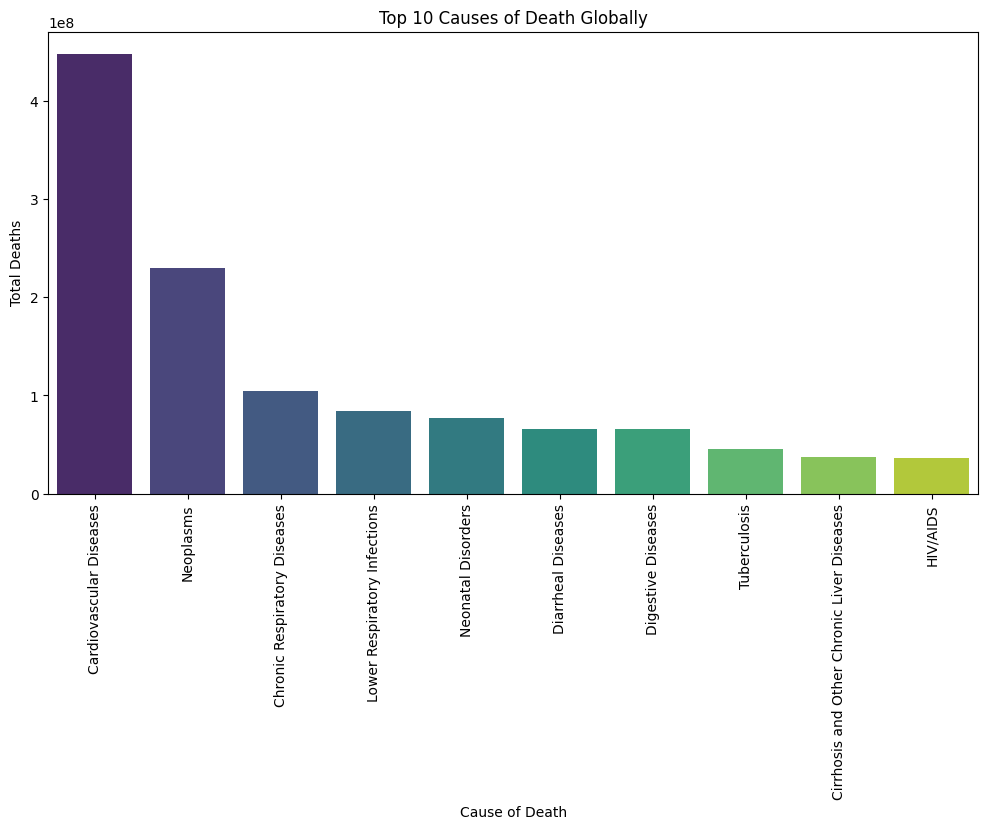

In [30]:
# Plot the top 10 causes of death globally
plt.figure(figsize=(12, 6))
sns.barplot(x=global_deaths.index[:10], y=global_deaths.values[:10], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Causes of Death Globally')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.show()

<ipython-input-31-946e46055a41>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_distribution.index, y=cause_distribution.values, palette="viridis")


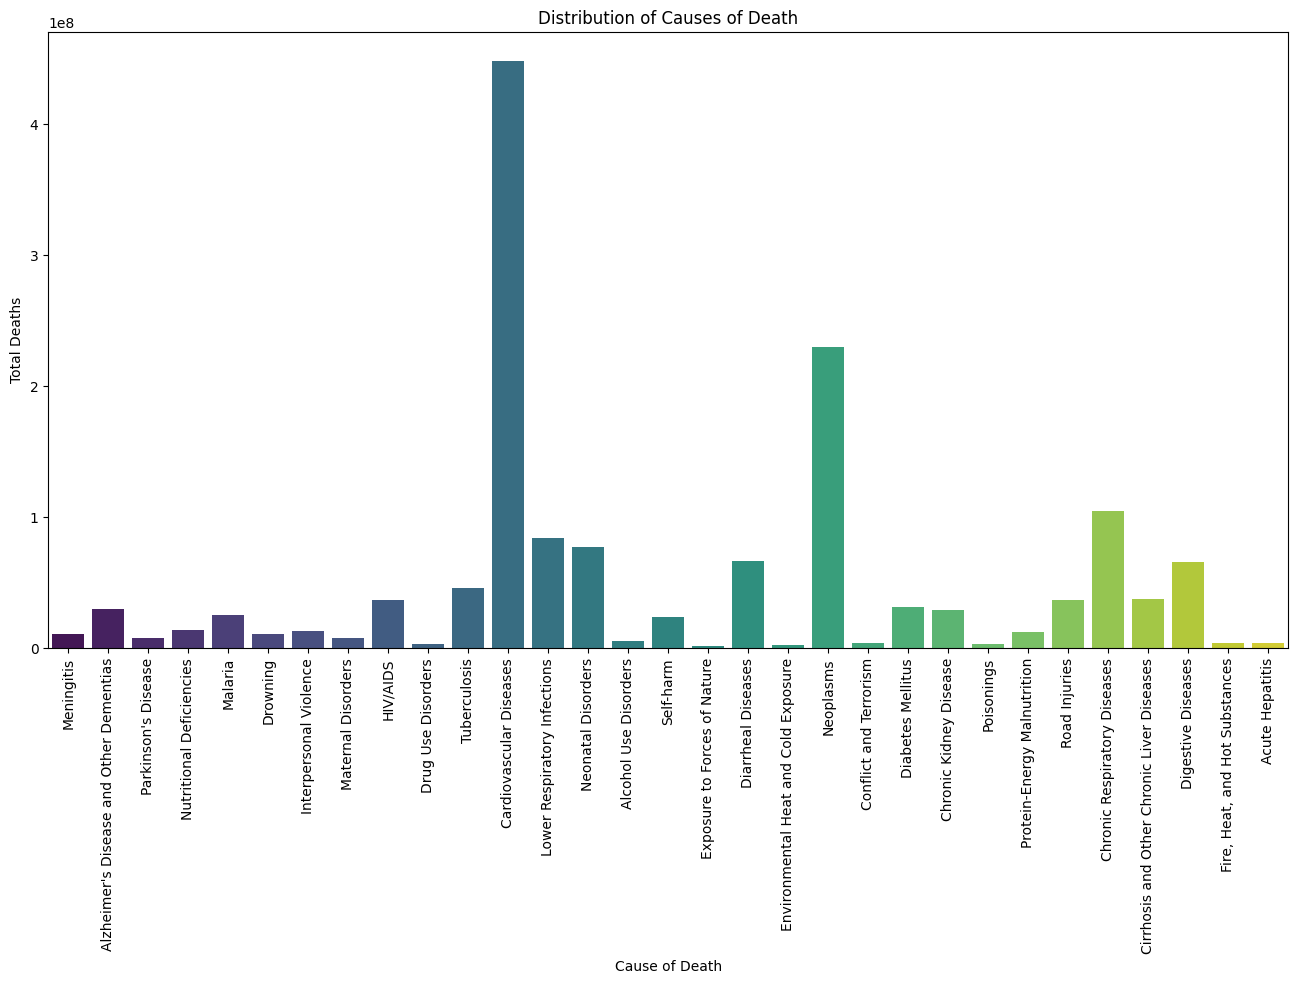

In [31]:
# Sum the number of deaths for each cause of death
cause_distribution = df.drop(columns=['Country/Territory', 'Year']).sum()

# distribution of causes of death
plt.figure(figsize=(16, 8))
sns.barplot(x=cause_distribution.index, y=cause_distribution.values, palette="viridis")
plt.title('Distribution of Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.show()

By identifying the top 10 causes of death globally we can notice that the **highest** one was **Cardiovascular Disease**.

In [32]:
# Grouping by 'Country/Territory' and 'Year' for regional analysis
regional_deaths = df.groupby(['Country/Territory', 'Year']).sum().reset_index()
print(regional_deaths.head())


  Country/Territory  Year  Meningitis  \
0       Afghanistan  1990        2159   
1       Afghanistan  1991        2218   
2       Afghanistan  1992        2475   
3       Afghanistan  1993        2812   
4       Afghanistan  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  \
0                      2087       93      1370                    1538   
1                      2153      189      1391                    2001   
2                      2441      239      1514                    2299   
3                      2837      108      1687        

## Evaluate trends over time

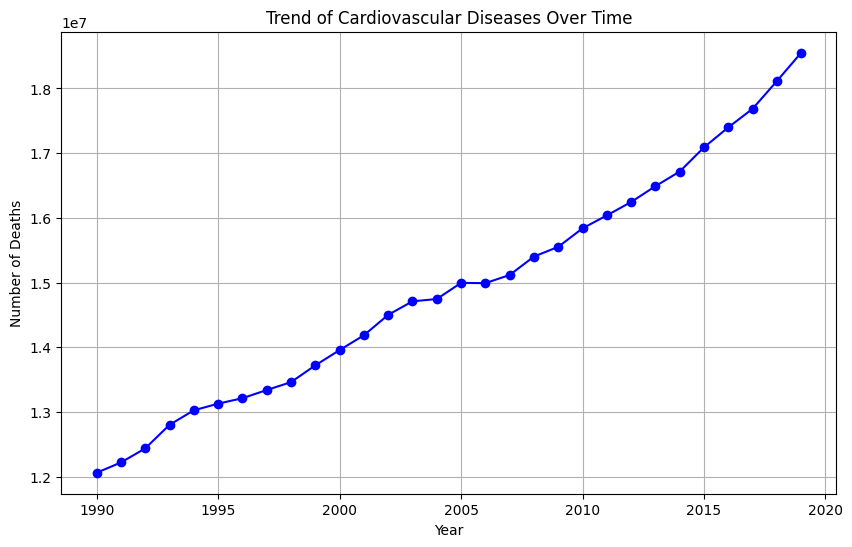

In [33]:
# Group by Year and sum deaths for a Cardiovascular Diseases
yearly_cardiovascular = df.groupby('Year')['Cardiovascular Diseases'].sum()

# Plot the trend for Cardiovascular Diseases over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_cardiovascular.index, yearly_cardiovascular.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Cardiovascular Diseases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()


By Analysing the trend Of **Cardiovascular Disease** we can see it getting increased from **2006 to 2019**.

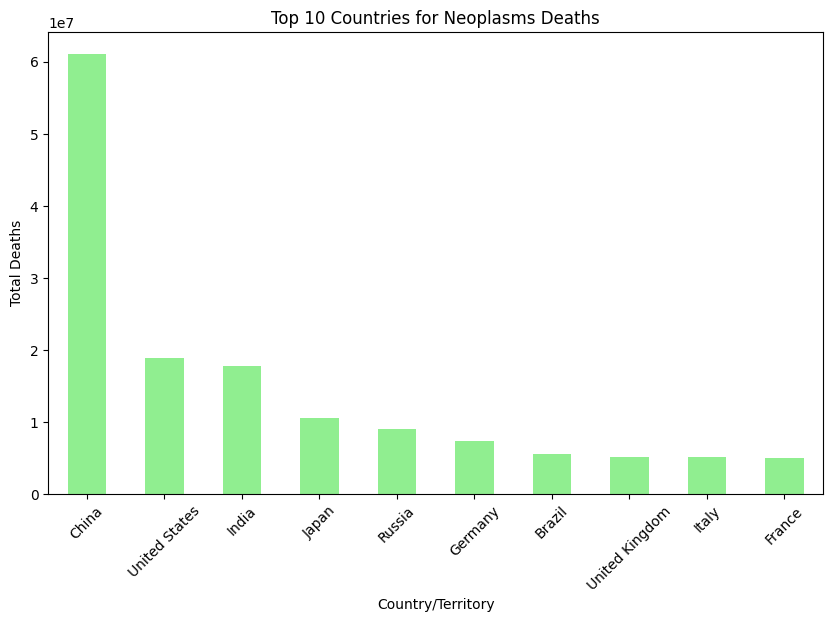

In [34]:
# Diabetes Neoplasms
top_countries = df.groupby('Country/Territory')["Neoplasms"].sum().sort_values(ascending=False).head(10)

# Plot the top 10 countries for that cause of death
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='lightgreen')
plt.title(f'Top 10 Countries for Neoplasms Deaths')
plt.xlabel('Country/Territory')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

## Create informative and aesthetically appealing graphs

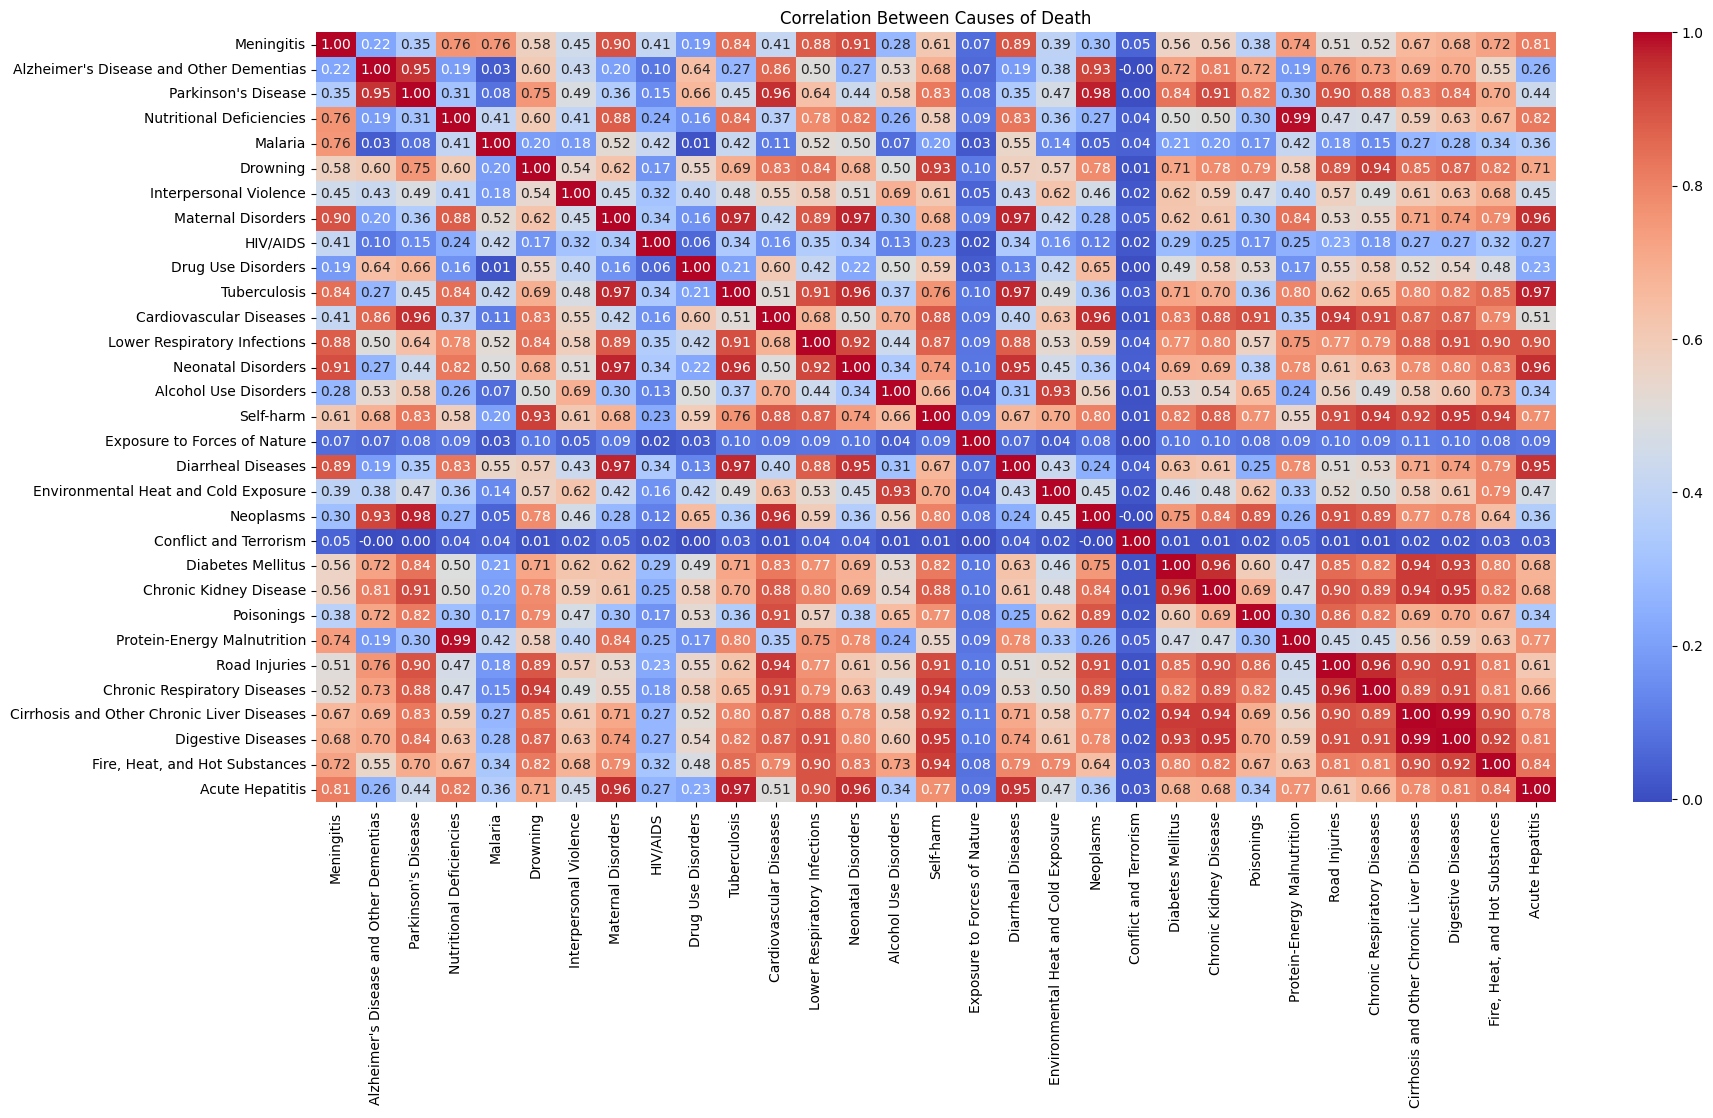

In [35]:
# Advanced Visualizations
# Heatmap of causes of death correlations
plt.figure(figsize=(20, 10))
correlation_matrix = df.iloc[:, 2:].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Between Causes of Death')
plt.show()

The plot represent a correlation matrix, visualizing the relationships between different variables.

Based on the colors, it seems that there are several strong positive and negative correlations between the variables.

<Figure size 1500x1000 with 0 Axes>

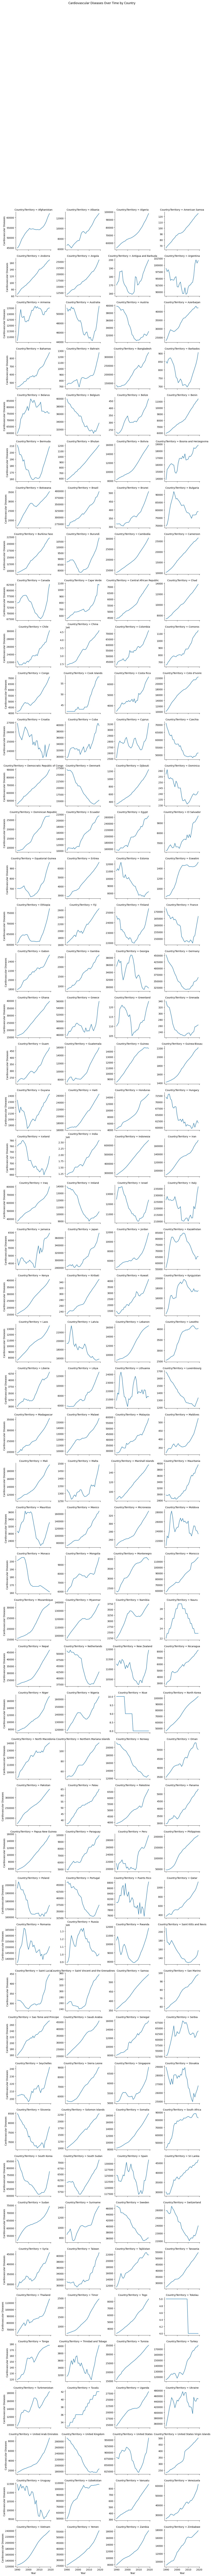

In [36]:
# Facet Grid for Multi-dimensional Analysis of Causes of Death Over Time by Country
plt.figure(figsize=(15, 10))

# Creating a facet grid with seaborn
g = sns.FacetGrid(regional_deaths, col="Country/Territory", col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, "Year", "Cardiovascular Diseases")  # Change to other causes as needed

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Cardiovascular Diseases Over Time by Country')
plt.show()

The plot represents  **Cardiovascular Diseases Over Time by Country**
We can notice by deep analysis that the highest country is **China**.

In [37]:
# Interactive Line Plot for Cardiovascular Diseases Over Time by Country
fig = px.line(regional_deaths, x='Year', y='Cardiovascular Diseases', color='Country/Territory',
              title='Cardiovascular Diseases Over Time by Country')
fig.show()

Line plot represents Cardiovascular Diseases Over Time by Country.
The **Highest** record recorded in **China**.

## Linear Regression Forecast of Cardiovascular Disease Deaths

In [38]:
forecast_data = df.groupby('Year')['Cardiovascular Diseases'].sum().reset_index()
x= forecast_data['Year'].values.reshape(-1,1)
y= forecast_data['Cardiovascular Diseases'].values

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [40]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

In [41]:
def plot_predictions(X, y, X_test, y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color= 'blue', label='Actual Data')
    plt.plot( X_test, y_pred,color= 'red', linewidth=2, label=f'{model_name} prediction')
    plt.title(f'{model_name} - Forecast of Cardiovascular Diseases Deaths')
    plt.xlabel('Year')
    plt.ylabel('Number of Deaths')
    plt.legend()
    plt.grid(True)
    plt.show()


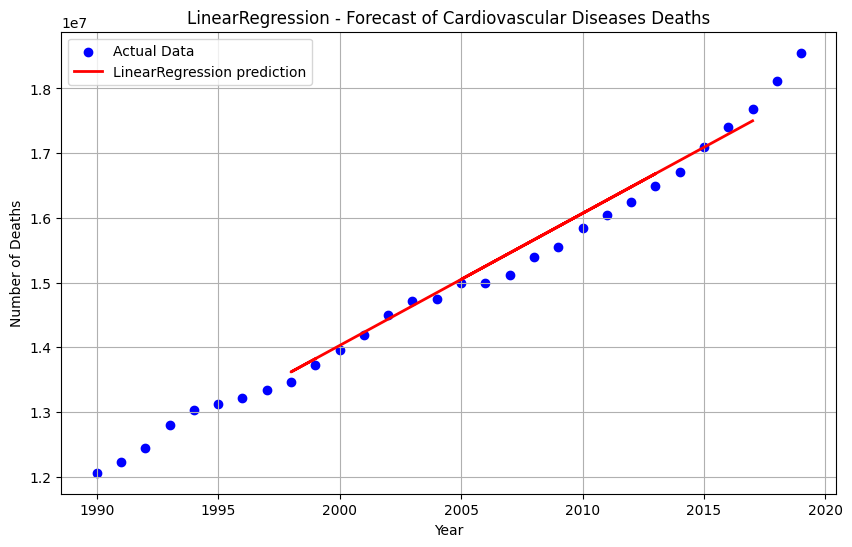

In [42]:
plot_predictions(x, y, x_test, y_test, y_pred_linear ,'LinearRegression' )

A **linear regression model** predicting the number of cardiovascular disease deaths over time.

In [43]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression - MSE :{mse_linear}, R-squard :{r2_linear}')

Linear Regression - MSE :37606101782.926506, R-squard :0.9827637766379665


## Polynomial Regression (Degree 3) Forecast of Cardiovascular Disease Deaths

In [44]:
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x_train)
x_test_poly= poly_features.transform(x_test)

In [45]:
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

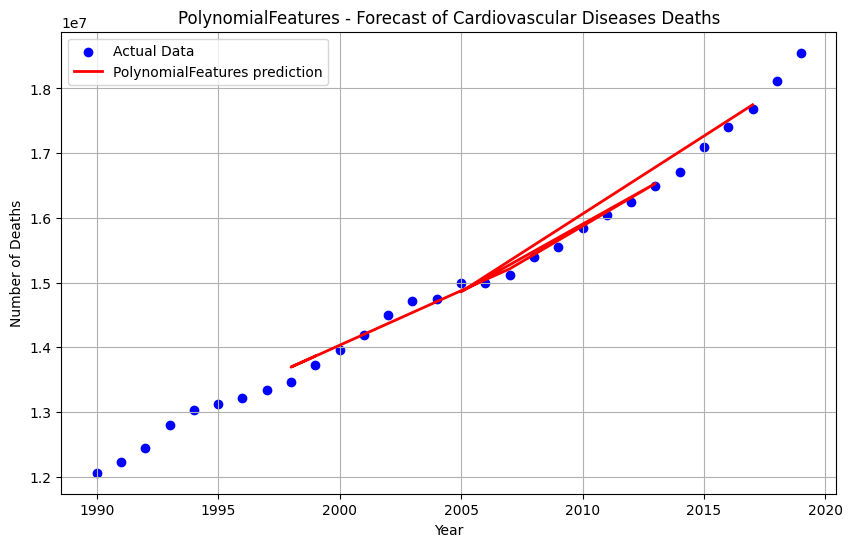

In [46]:
plot_predictions(x, y, x_test, y_test, y_pred_poly, 'PolynomialFeatures' )

A **polynomialfeatures model** predicting the number of cardiovascular disease deaths over time.

In [47]:
mse_poly = mean_squared_error(y_test,  y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression - MSE :{mse_poly}, R-squard :{r2_poly}')

Polynomial Regression - MSE :18163550583.353, R-squard :0.9916749942147846


## Ridge Regression Forecast of Cardiovascular Disease Deaths

In [48]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

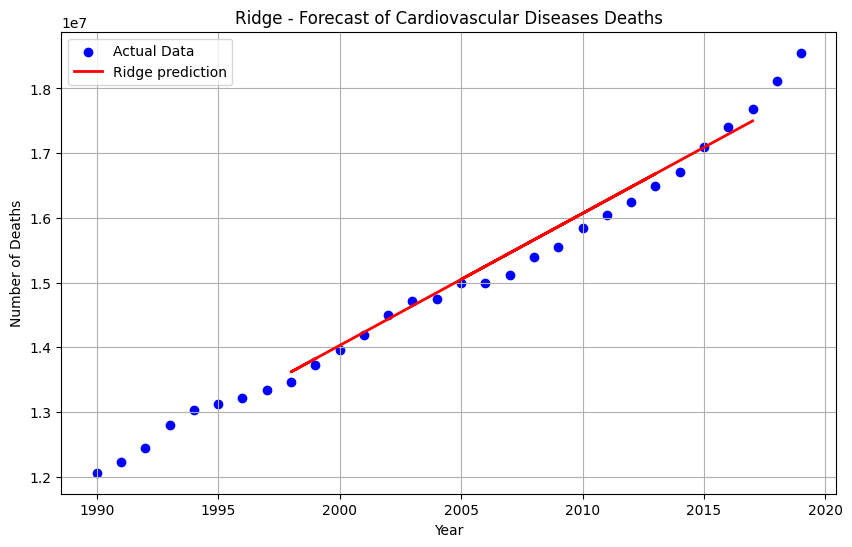

In [49]:
plot_predictions(x, y, x_test, y_test, y_pred_ridge, 'Ridge' )

A **ridge model** predicting the number of cardiovascular disease deaths over time.

In [50]:
mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")
r2_ridge= r2_score(y_test, y_pred_ridge)
print(f"R-squard: {r2_ridge}")

Mean Squared Error: 37644433559.24207
R-squard: 0.9827462078119752


## Performance Evaluation of Polynomial Regression (Degree 3) for Cardiovascular Disease Deaths

In [51]:
# Initialize polynomial features and model pipeline
poly = PolynomialFeatures(degree=3)
poly_model = make_pipeline(poly, LinearRegression())

# Train the model
poly_model.fit(x_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(x_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Polynomial Regression Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression Mean Absolute Error: {mae_poly:.2f}")

Polynomial Regression Mean Squared Error: 18163550583.35
Polynomial Regression Mean Absolute Error: 119153.69


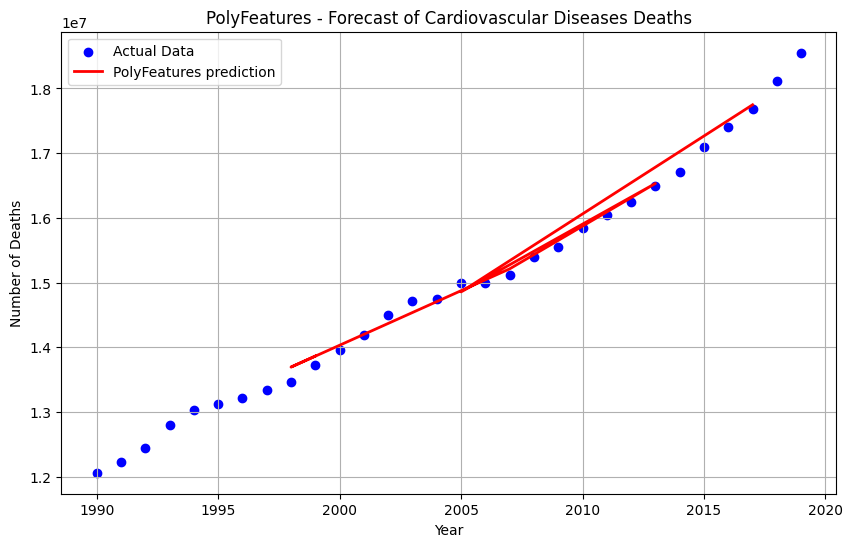

In [52]:
plot_predictions(x, y, x_test, y_test, y_pred_poly, 'PolyFeatures' )

A **polyfeatures model 'polynomial features and model pipeline'** predicting the number of cardiovascular disease deaths over time.

## Box Plot of Cardiovascular Disease Deaths

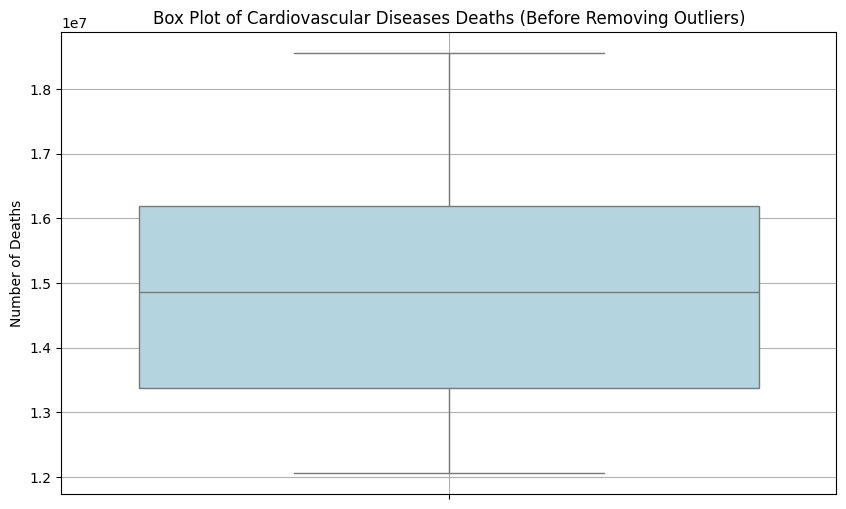

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(y =forecast_data['Cardiovascular Diseases'], color='lightblue')
plt.title('Box Plot of Cardiovascular Diseases Deaths (Before Removing Outliers)')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

Detecting the outliers.

## Scatter Plot of Cardiovascular Disease Deaths

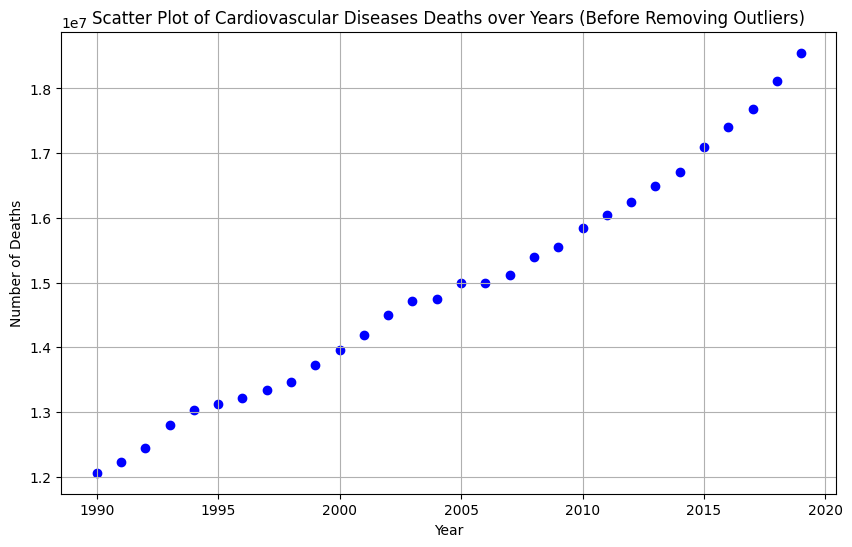

In [54]:
plt.figure(figsize = (10, 6))
plt.scatter(forecast_data['Year'], forecast_data['Cardiovascular Diseases'], color = 'blue')
plt.title('Scatter Plot of Cardiovascular Diseases Deaths over Years (Before Removing Outliers)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

Scatter plot of **cardiovascular disease** over years **befor removing outliers**.

In [55]:
Q1 = forecast_data['Cardiovascular Diseases'].quantile(0.25)
Q3 = forecast_data['Cardiovascular Diseases'].quantile(0.75)
IQR = Q3 - Q1

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 +1.5*IQR

print (f"lower_bound : {Lower_bound}, upper_bound : {Upper_bound}")

filterd_data = forecast_data[(forecast_data['Cardiovascular Diseases'] >= Lower_bound) &
                             (forecast_data['Cardiovascular Diseases']  <= Upper_bound)]

print (f"Original data size: {forecast_data.shape[0]}, Filterd data size: {filterd_data.shape[0]}")

lower_bound : 9135499.875, upper_bound : 20428296.875
Original data size: 30, Filterd data size: 30


Determine the **Lower_Bound** and **Upper_Bound**.

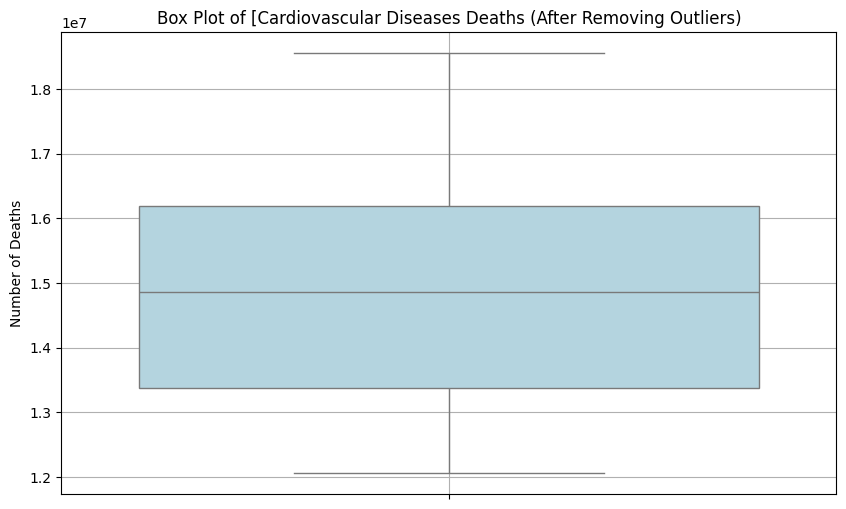

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(y = filterd_data['Cardiovascular Diseases'], color='lightblue')
plt.title('Box Plot of [Cardiovascular Diseases Deaths (After Removing Outliers)')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

Detecting if there is any remaining outliers.

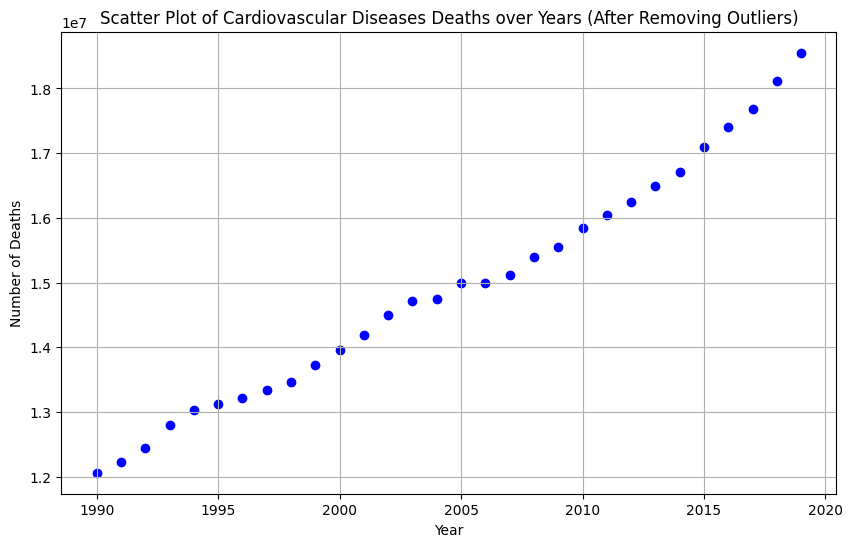

In [57]:
plt.figure(figsize = (10, 6))
plt.scatter(forecast_data['Year'], filterd_data['Cardiovascular Diseases'], color = 'blue')
plt.title('Scatter Plot of Cardiovascular Diseases Deaths over Years (After Removing Outliers)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

Scatter plot of **cardiovascular disease** over years **after removing outliers**.

## Dimensionality Reduction and Clustering

In this section, we'll apply Principal Component Analysis (PCA) to reduce the dimensionality of the data and then use KMeans clustering to group similar countries based on their cause-of-death profiles.

In [62]:
!pip install fanalysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.0 MB/s eta 0:00:00


## Principal Component Analysis (PCA) using fanalysis

PCA is a dimensionality reduction technique that aims to identify the principal components, which are linear combinations of the original features capturing the most variance in the data. By projecting the data onto these principal components, we can reduce the number of dimensions while retaining as much information as possible.

This cell imports necessary libraries, automatically selects numerical features from your DataFrame (`df`), standardizes them using `StandardScaler`, and creates a new DataFrame (`stdd`) with the standardized values.

In [65]:
# Import necessary libraries
import pandas as pd
from fanalysis.pca import PCA as fanalysis_PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

# Automatically select numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Standardize the numerical features using StandardScaler
x = df.loc[:, numerical_features].values
x = StandardScaler().fit_transform(x)

# Create a new DataFrame with standardized values
stdd = pd.DataFrame(x, columns=numerical_features, index=df.index)

## Principal Component Analysis (PCA) using fanalysis

PCA is a dimensionality reduction technique that aims to identify the principal components, which are linear combinations of the original features capturing the most variance in the data. By projecting the data onto these principal components, we can reduce the number of dimensions while retaining as much information as possible.

This cell imports necessary libraries, automatically selects numerical features from your DataFrame (`df`), standardizes them using `StandardScaler`, and creates a new DataFrame (`stdd`) with the standardized values.

### 2:Applying PCA and Getting Eigenvalues

In [79]:
# Apply PCA with the standardized data using fanalysis
acp = fanalysis_PCA(std_unit=True,
                     row_labels=df.index,
                     col_labels=numerical_features)
acp.fit(stdd.values)

# Get eigenvalues (acp.eig_[0])
eig_vals = acp.eig_[0]  # Eigenvalues represent the variance explained by each principal component.
# Get explained variance ratio (acp.eig_[1])
explained_variance_ratio = acp.eig_[1]  # This indicates the proportion of total variance explained by each component.
principalComponents = acp.transform(stdd.values)

# Print eigenvalues and explained variance ratio
print("Eigenvalues:", eig_vals)
print("Explained Variance Ratio:", explained_variance_ratio)

Eigenvalues: [1.83213820e+01 4.64387382e+00 1.46672381e+00 1.19746007e+00
 1.02614382e+00 9.90655873e-01 9.83768800e-01 7.40243410e-01
 6.17591022e-01 5.72806417e-01 4.87862242e-01 3.80941240e-01
 1.50930096e-01 1.21684985e-01 7.04563266e-02 3.92050542e-02
 3.49181662e-02 2.81604971e-02 2.55764381e-02 2.02607944e-02
 1.68006129e-02 1.46220260e-02 9.96716031e-03 9.00629479e-03
 6.91238703e-03 5.78706698e-03 5.18144123e-03 4.50710001e-03
 2.85326286e-03 1.80113575e-03 1.23627438e-03 6.80369830e-04]
Explained Variance Ratio: [5.72543187e+01 1.45121057e+01 4.58351189e+00 3.74206272e+00
 3.20669942e+00 3.09579960e+00 3.07427750e+00 2.31326066e+00
 1.92997194e+00 1.79002005e+00 1.52456950e+00 1.19044137e+00
 4.71656551e-01 3.80265579e-01 2.20176021e-01 1.22515794e-01
 1.09119270e-01 8.80015535e-02 7.99263691e-02 6.33149827e-02
 5.25019154e-02 4.56938313e-02 3.11473760e-02 2.81446712e-02
 2.16012095e-02 1.80845843e-02 1.61920038e-02 1.40846875e-02
 8.91644644e-03 5.62854920e-03 3.86335745e-03

This cell applies PCA using `fanalysis` on the standardized data (`stdd`). It then extracts the eigenvalues and explained variance ratio, which represent the amount of variance captured by each principal component and their proportion of total variance, respectively.


3: Individual and Variable Contributions

In [67]:
# Get contributions and cos2 for individuals and variables
df_indvs = acp.row_contrib_
df_var = acp.col_contrib_

# Print the results
print("\nContributions des points lignes:\n", df_indvs)
print("\nCos2 des points lignes:\n", acp.row_cos2_)
print("\nContributions des points colonnes:\n", df_var)
print("\nCos2 des points colonnes:\n", acp.col_cos2_)


Contributions des points lignes:
 [[6.81869428e-05 8.28999287e-04 1.13963216e-05 ... 2.35078833e-02
  6.84624161e-02 4.82375863e-02]
 [4.55178588e-05 9.37463750e-04 1.37688305e-08 ... 2.04870224e-02
  7.17641131e-02 5.54454137e-02]
 [1.69875064e-05 1.20242942e-03 2.10372244e-06 ... 1.58938939e-02
  8.40753393e-02 7.06497185e-02]
 ...
 [1.52699579e-04 4.35066706e-04 7.87161140e-05 ... 4.02135174e-08
  9.45485044e-03 1.28024998e-03]
 [1.61925810e-04 3.59382794e-04 1.16598813e-04 ... 2.72440093e-06
  1.02697599e-02 1.56172830e-03]
 [1.59782445e-04 3.17816417e-04 1.94454134e-04 ... 2.65510950e-06
  1.07664285e-02 1.79546846e-03]]

Cos2 des points lignes:
 [[2.05508850e-02 6.33294399e-02 2.74969241e-04 ... 6.96515926e-04
  1.39231715e-03 5.39885539e-04]
 [1.42212581e-02 7.42391274e-02 3.44384312e-07 ... 6.29250040e-04
  1.51293461e-03 6.43292724e-04]
 [5.47833643e-03 9.82880778e-02 5.43122275e-05 ... 5.03892148e-04
  1.82955022e-03 8.46089525e-04]
 ...
 [5.07909565e-02 3.66797684e-02 2.096

This cell calculates and prints the contributions and cos2 values for both individuals (rows) and variables (columns).
* **Contributions:** Indicate the importance of each individual/variable to a particular principal component. Higher contributions suggest a stronger influence on that component.
* **Cos2:** Represents the quality of representation of an individual/variable on a principal component. Values close to 1 indicate a good representation.

 ### 4: Correlation Circle Visualization

<Figure size 1000x800 with 0 Axes>

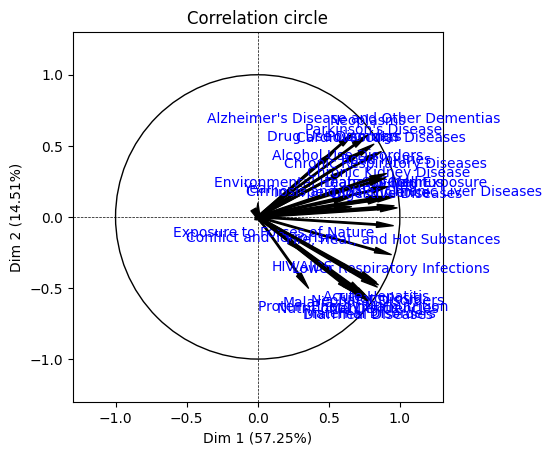

In [70]:
# Correlation circle plot
plt.figure(figsize=(10, 8))
acp.correlation_circle(num_x_axis=1, num_y_axis=2)


This cell creates a correlation circle plot, which visualizes the relationships between the original variables and the principal components. Variables close to each other on the circle are positively correlated, while those far apart are negatively correlated. Variables near the origin have low contributions to the principal components.

5: Mapping of Row Points Visualization

<Figure size 1000x800 with 0 Axes>

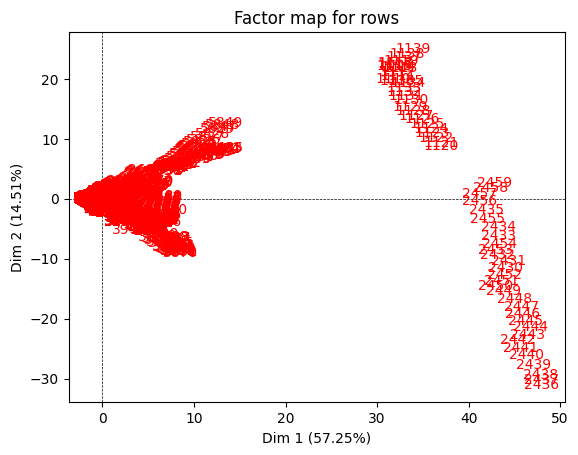

In [73]:
# Mapping of row points
plt.figure(figsize=(10, 8))
acp.mapping_row(num_x_axis=1, num_y_axis=2)


This cell creates a mapping of row points plot, which shows the projection of the observations (rows) onto the principal components. Observations close to each other in the plot are similar in terms of their values for the original variables.

### Clustering using KMeans
Clustering is an unsupervised machine learning technique used to group similar data points together based on their features. KMeans is a popular clustering algorithm that aims to partition the data into k clusters, where each data point belongs to the cluster with the nearest mean (centroid).

## 1. Determining the Optimal Number of Clusters
Before applying KMeans, it's crucial to determine the optimal number of clusters (k) for your data. We can use the Elbow method and the Silhouette score for this purpose.

#### Elbow Method:




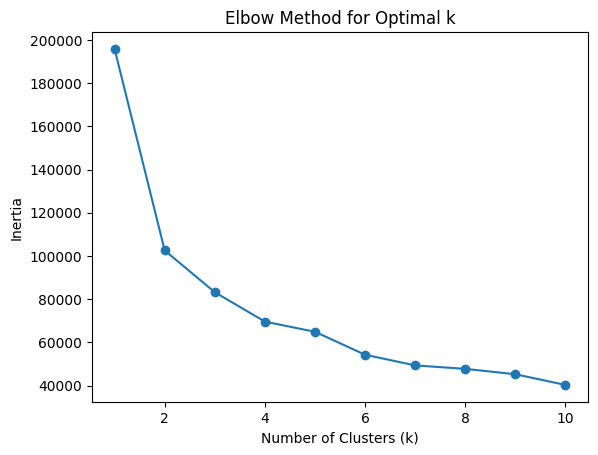

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia (within-cluster sum of squares) for different values of k
inertia = []
for i in range(1, 11):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(stdd.values)  # Use the standardized data from PCA
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Silhouette Score:



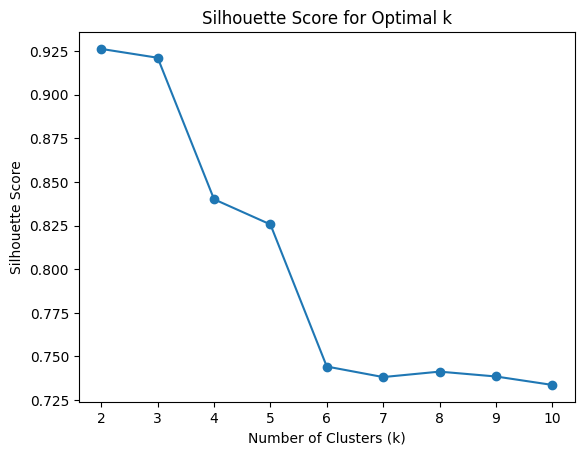

In [75]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette score for different values of k
silhouette_scores = []
for i in range(2, 11):  # Try k values from 2 to 10 (Silhouette score is not defined for k=1)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(stdd.values)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(stdd.values, labels))

# Plot the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Interpretation:

Elbow Method: Look for the "elbow" point in the curve where the inertia starts to decrease at a slower rate. This point often indicates a good value for k.
Silhouette Score: Choose the value of k that maximizes the Silhouette score. A higher Silhouette score indicates better-defined clusters.

*The optimal number of clusters is 3, as indicated by the "elbow point" on the graph. At this point, the inertia (within-cluster sum of squares) decreases significantly, and beyond this point, the rate of decrease slows down. This is where the "elbow" is typically found in the Elbow Method.*

### 2. Applying KMeans with the Optimal k


In [77]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(stdd.values)  # Use the standardized data from PCA
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

### 3. Visualizing the Clusters


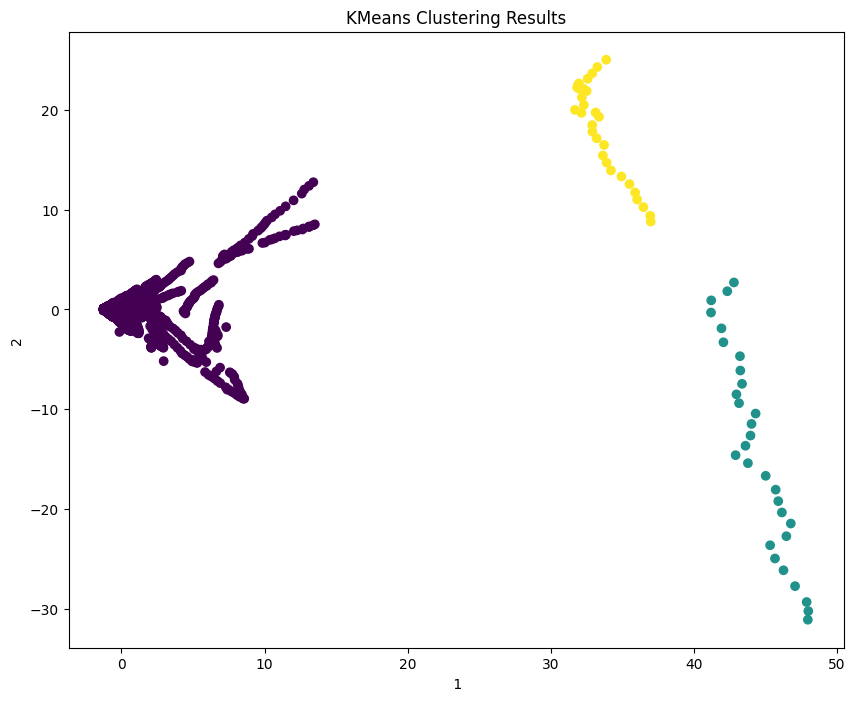

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel(' 1')
plt.ylabel('2')
plt.show()

### 4. Interpreting the Clusters


In [83]:
# Calculate mean values of features for each cluster
cluster_means = df.groupby('Cluster')[numerical_features].mean()
print(cluster_means)

           Year    Meningitis  Alzheimer's Disease and Other Dementias  \
Cluster                                                                  
0        2004.5   1325.862871                              3742.480528   
1        2004.5  66964.800000                             56918.700000   
2        2004.5  16029.966667                            179394.866667   

         Parkinson's Disease  Nutritional Deficiencies       Malaria  \
Cluster                                                                
0                 806.909406               1636.506106   3777.230033   
1               25227.733333             109685.633333  81308.133333   
2               51103.066667              19474.533333    447.266667   

             Drowning  Interpersonal Violence  Maternal Disorders  \
Cluster                                                             
0          877.548185             1772.178383          856.656766   
1        70347.933333            41238.766667        76414.96